Nama : Sunday B. Putera Mandiri <br>
Email : sundaybontong@gmail.com <br>
Domisili : Kab. Bandung

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
from tqdm.notebook import tqdm as tq
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt                                                     #Mengimpor modul matplotlib
import matplotlib.image as mpimg

In [ ]:
mypath = "/content/drive/MyDrive/data_set/rockpaperscissors"

# Membagi data menjadi train, test, & validation

In [ ]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
  for name in files:
    full_path.append(os.path.join(path, name))
    tag.append(path.split('/')[-1])
    file_name.append(name)

In [ ]:
pd.Series(tag).unique().tolist()

#print(len(tag))

['paper', 'scissors', 'rock']

In [ ]:
#Memasukkan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah data
df = pd.DataFrame({"path":full_path, "file_name":file_name,"tag":tag})
df.groupby(['tag']).size()

tag
paper       712
rock        726
scissors    750
dtype: int64

In [ ]:
df

,path,file_name,tag
0,/content/drive/MyDrive/data_set/rockpapersciss...,0eqArS2GgsBeqgSn.png,paper
1,/content/drive/MyDrive/data_set/rockpapersciss...,04l5I8TqdzF9WDMJ.png,paper
2,/content/drive/MyDrive/data_set/rockpapersciss...,0RA9rcrv8iVvuDDU.png,paper
3,/content/drive/MyDrive/data_set/rockpapersciss...,0Uomd0HvOB33m47I.png,paper
4,/content/drive/MyDrive/data_set/rockpapersciss...,0Og76sl5CJhbxWWx.png,paper
...,...,...,...
2183,/content/drive/MyDrive/data_set/rockpapersciss...,sY2021zJacpvGLBT.png,rock
2184,/content/drive/MyDrive/data_set/rockpapersciss...,iCR447ESdUXjdOFz.png,rock
2185,/content/drive/MyDrive/data_set/rockpapersciss...,rtyjzSfCZlfTPTox.png,rock
2186,/content/drive/MyDrive/data_set/rockpapersciss...,vL6UMd1OOIGuEdFu.png,rock


In [ ]:
#Variabel yang digunakan pada pemisahan data ini
X = df['path']
y = df['tag']

#split dataset awal menjadi data train dan valdition
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.40, random_state=300)


In [ ]:
#Menyatukan kedalam masing-masing dataframe
df_tr = pd.DataFrame({"path":X_train, "tag":y_train, "set":"train"})
#df_te = pd.DataFrame({"path":X_test, "tag":y_test, "set":"test"})
df_val = pd.DataFrame({"path":X_val, "tag":y_val, "set":"validation"})


In [ ]:
print("train size", len(df_tr))
#print("test size", len(df_te))
print("validation size", len(df_val))

train size 1312
validation size 876


In [ ]:
# Melihat proporsi pada masing masing set apakah sudah oke atau masih ada yang ingin diubah

df_all = pd.concat([df_tr,df_val]).reset_index(drop=1)

print(300*"=")
print(df_all.groupby(['set','tag']).size(),'\n')

print(300*"=")
#cek sample datanya
df_all.sample(3)

set         tag     
train       paper       424
            rock        437
            scissors    451
validation  paper       288
            rock        289
            scissors    299
dtype: int64 



,path,tag,set
1849,/content/drive/MyDrive/data_set/rockpapersciss...,paper,validation
52,/content/drive/MyDrive/data_set/rockpapersciss...,scissors,train
416,/content/drive/MyDrive/data_set/rockpapersciss...,rock,train


## Merapikan/memindahkan ke folder set masing masing

In [ ]:
datasource_path = "/content/drive/MyDrive/data_set/rockpaperscissors/"
dataset_path = "/content/drive/MyDrive/data_set/rockpaperscissors_dataset/"


In [ ]:
for index, row in tq(df_all.iterrows()):
  #detect filepath
  file_path = row['path']
  if os.path.exists(file_path) == False:
    file_path = os.path.join(datasource_path, row['tag'], row['image'].split('.')[0])

  #make folder destionation direktori
  if os.path.exists(os.path.join(dataset_path, row['set'], row['tag'])) == False:
    os.makedirs(os.path.join(dataset_path,row['set'], row['tag']))

  #define file destination
  destionation_file_name = file_path.split('/')[-1]
  file_dest = os.path.join(dataset_path, row['set'], row["tag"], destionation_file_name)

  #copy file form source to destionation
  if os.path.exists(file_dest) == False:
    shutil.copy2(file_path, file_dest)


0it [00:00, ?it/s]

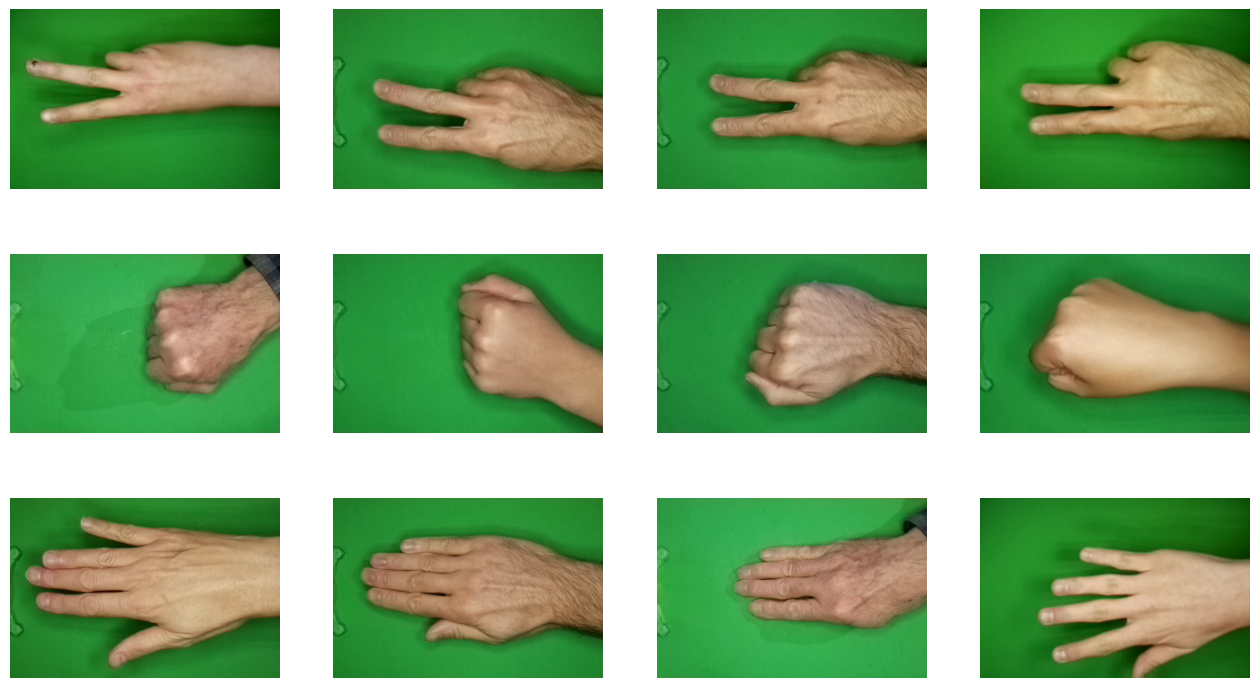

In [ ]:
import matplotlib.pyplot as plt                                                     #Mengimpor modul matplotlib
import matplotlib.image as mpimg

fold_gunting = os.path.join('/content/drive/MyDrive/data_set/rockpaperscissors_dataset/train/scissors')                #Mendefinisikan Folder Training untuk gambar Gunting
fold_batu= os.path.join('/content/drive/MyDrive/data_set/rockpaperscissors_dataset/train/rock')                        #Mendefinisikan Folder Training untuk gambar Batu
fold_kertas = os.path.join('/content/drive/MyDrive/data_set/rockpaperscissors_dataset/train/paper')

file_gunting = os.listdir(fold_gunting)
file_batu = os.listdir(fold_batu)
file_kertas = os.listdir(fold_kertas)


nrows = 3                                                                           #Jumlah baris tampilan gambar
ncols = 4                                                                           #Jumlah baris tampilan gambar

pic_index = 0                                                                        #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                           #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                      #Index tambah bertambah 4 setiap baris
gbr_tampil_gunting  = [os.path.join(fold_gunting, fname)                              #Menampilkan gambar gunting
                      for fname in file_gunting[pic_index-4:pic_index]]
gbr_tampil_batu     = [os.path.join(fold_batu, fname)                               #Menampilkan gambar batu
                      for fname in file_batu[pic_index-4:pic_index]]
gbr_tampil_kertas   = [os.path.join(fold_kertas, fname)                             #Menampilkan gambar kertas
                      for fname in file_kertas[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_batu+gbr_tampil_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)                                             #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                    #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Generator


In [ ]:
base_dir = datasource_path
train_dir = os.path.join(base_dir,"train")
#test_dir = os.path.join(base_dir,"test")
validation_dir = os.path.join(base_dir,"validation")

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=25,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    validation_split=0.4
)

In [ ]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=5,
    seed=42,
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=5,
    seed=42,
    shuffle=False,
    subset="validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


#Membuat Model


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# compile model dengan "adam" optimizer loss function "binary_crossentryopy"
model.compile(
    optimizer=tf.keras.optimizers.SGD(nesterov=True),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Training dan testing model

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="loss",
            patience=10,
            restore_best_weights=True)]
)

Epoch 1/25
100/100 - 65s - loss: 1.1006 - accuracy: 0.3320 - val_loss: 1.0754 - val_accuracy: 0.5200 - 65s/epoch - 648ms/step
Epoch 2/25
100/100 - 56s - loss: 1.0745 - accuracy: 0.3888 - val_loss: 1.1222 - val_accuracy: 0.3200 - 56s/epoch - 563ms/step
Epoch 3/25
100/100 - 57s - loss: 1.0012 - accuracy: 0.5360 - val_loss: 0.9898 - val_accuracy: 0.5200 - 57s/epoch - 575ms/step
Epoch 4/25
100/100 - 58s - loss: 0.8459 - accuracy: 0.6480 - val_loss: 1.0716 - val_accuracy: 0.4800 - 58s/epoch - 581ms/step
Epoch 5/25
100/100 - 57s - loss: 0.6972 - accuracy: 0.7134 - val_loss: 1.3327 - val_accuracy: 0.3200 - 57s/epoch - 570ms/step
Epoch 6/25
100/100 - 59s - loss: 0.5526 - accuracy: 0.7980 - val_loss: 0.9017 - val_accuracy: 0.5200 - 59s/epoch - 592ms/step
Epoch 7/25
100/100 - 59s - loss: 0.4178 - accuracy: 0.8477 - val_loss: 0.4160 - val_accuracy: 0.8800 - 59s/epoch - 586ms/step
Epoch 8/25
100/100 - 58s - loss: 0.3875 - accuracy: 0.8520 - val_loss: 0.4030 - val_accuracy: 0.8400 - 58s/epoch - 584

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
# Testing model
model.evaluate(validation_generator)

# test_loss, test_accuracy = model.evaluate(validation_generator)
# print(f'Test accuracy: {test_accuracy}')
# print(f'Test loss: {test_loss}')

175/175 [==============================] - 28s 160ms/step - loss: 0.1868 - accuracy: 0.9382


[0.18679076433181763, 0.9382150769233704]

Saving 6bGxG6c9DxmZBcIB.png to 6bGxG6c9DxmZBcIB.png
1/1 [==============================] - 0s 187ms/step
6bGxG6c9DxmZBcIB.png
rock


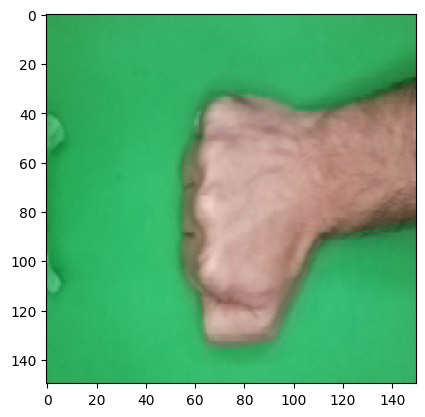

In [ ]:
from google.colab import files
uploaded = files.upload()

for name in uploaded.keys():
  img = image.load_img(name, target_size=(150,150))
  image_plot = plt.imshow(img)
  image_arr = image.img_to_array(img)
  image_arr = np.expand_dims(image_arr, axis=0)

  images = np.vstack([image_arr])
  pred = model.predict(images, batch_size = 10)

  print(name)
  if pred[0][0]==1:
    print("paper")
  elif pred[0][1]==1:
    print("rock")
  else:
    print("scissors")